In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={'figure.figsize':(10,7)})

**DATA FIELDS**

* Id : Restaurant id.

* Open Date : opening date for a restaurant

* City : City that the restaurant is in. Note that there are unicode in the names.

* City Group: Type of the city. Big cities, or Other.

* Type: Type of the restaurant. FC: Food Court, IL: Inline, DT: Drive Thru, MB: Mobile

* P1, P2 - P37: There are three categories of these obfuscated data. Demographic data are gathered from third party providers with GIS systems. These include population in any given area, age and gender distribution, development scales. Real estate data mainly relate to the m2 of the location, front facade of the location, car park availability. Commercial data mainly include the existence of points of interest including schools, banks, other QSR operators.

* Revenue: The revenue column indicates a (transformed) revenue of the restaurant in a given year and is the target of predictive analysis. Please note that the values are transformed so they don't mean real dollar values.

In [2]:
test = pd.read_csv(r"C:\Users\Admin\Desktop\Git\20-restaurant-sales\data\test.csv")
train = pd.read_csv(r"C:\Users\Admin\Desktop\Git\20-restaurant-sales\data\train.csv")

In [3]:
print("Train dataset has {} rows and {} columns" .format(train.shape[0], train.shape[1]))
print("Test dataset has {} rows and {} columns" .format(test.shape[0], test.shape[1]))

Train dataset has 137 rows and 43 columns
Test dataset has 100000 rows and 42 columns


In [4]:
train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [5]:
test.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

### Working with Open Date
* Train dataset spanned from 1996 - 2014 with 17 distinct years while
* Test dataset spanned from 1995 - 2014 with 20 distinct years
* Most revenue occured in the 2000 and least in 2014

In [7]:
#converting date column to datetime
train['Open Date'] = pd.to_datetime(train['Open Date'])
test['Open Date'] = pd.to_datetime(test['Open Date'])

In [8]:
#extracting years from date columns
train['Year'] = train['Open Date'].apply(lambda x:x.year)
test['Year'] = test['Open Date'].apply(lambda x:x.year)

In [9]:
print("Train dataset years startig from {} to {}" .format(train['Year'].min(), train['Year'].max()))
print("Test dataset years startig from {} to {}" .format(test['Year'].min(), test['Year'].max()))

Train dataset years startig from 1996 to 2014
Test dataset years startig from 1995 to 2014


In [10]:
train['Year'].nunique()

17

In [11]:
test['Year'].nunique()

20

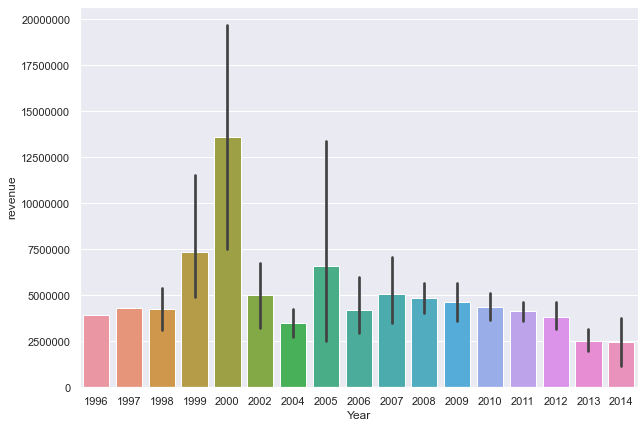

In [12]:
sns.barplot(x='Year', y='revenue', data= train)
plt.ticklabel_format(style='plain', axis='y')

### Working with City
* There are more occurrences of cities in "Big cities" in both dataset comapred to "others"
* The cities in test dataset surpasses that of train dataset
* Test dataset has 23 more cities than Train dataset

In [13]:
print("Test dataset has {} more cities than Train dataset" .format(abs(train['City'].nunique() - test['City'].nunique())))

Test dataset has 23 more cities than Train dataset


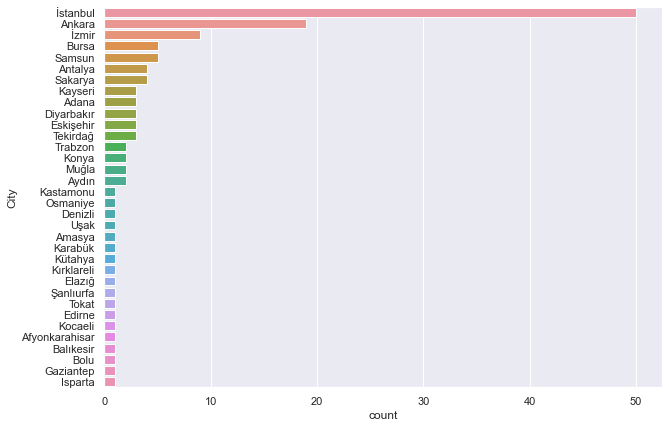

In [14]:
sns.countplot(y='City', data=train, order = train['City'].value_counts().index)

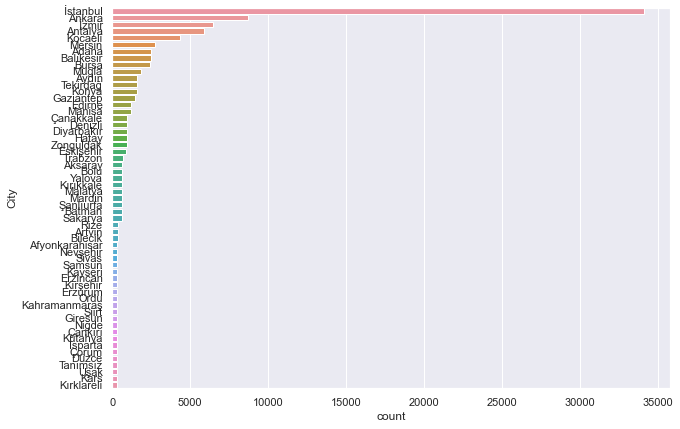

In [15]:
sns.countplot(y='City', data=test, order = test['City'].value_counts().index)

### Working with City Group
* Both train and test have equal number of City groups

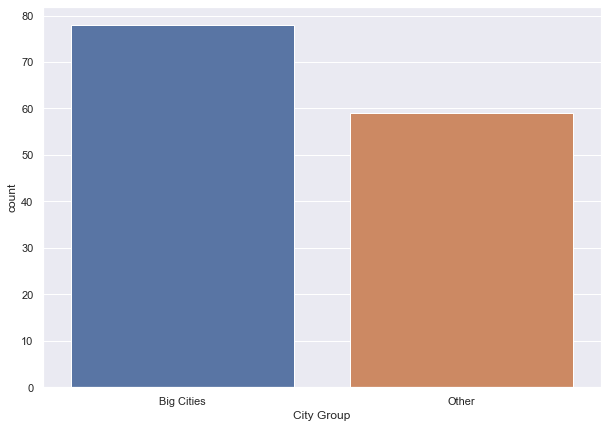

In [16]:
sns.countplot(train['City Group'])

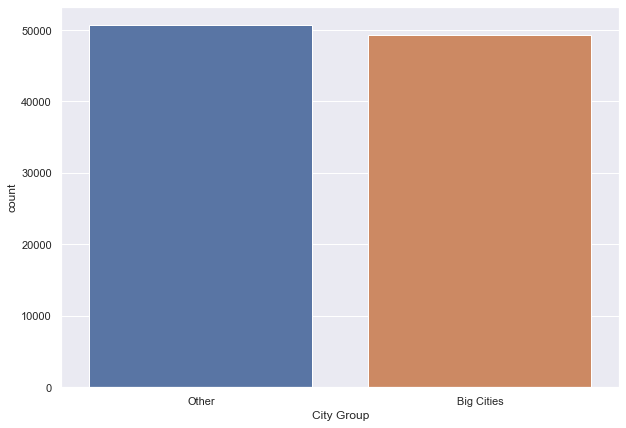

In [17]:
sns.countplot(test['City Group'])

### Working with Type
* Test dataset has 4 Types of restaurant while Train has just 3
* Food Court(FC) and Inline(IL) restaurant are the common types in both dataset

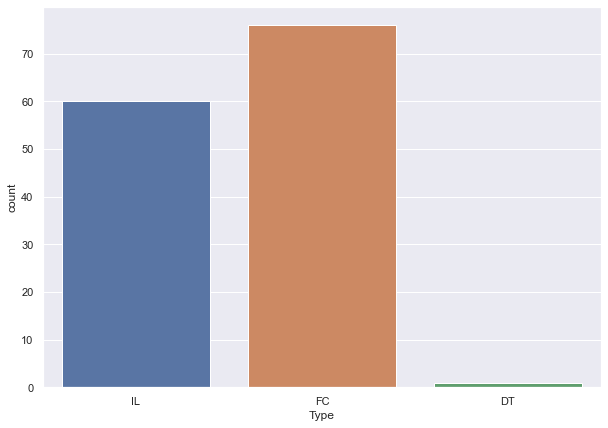

In [18]:
sns.countplot(train['Type'])

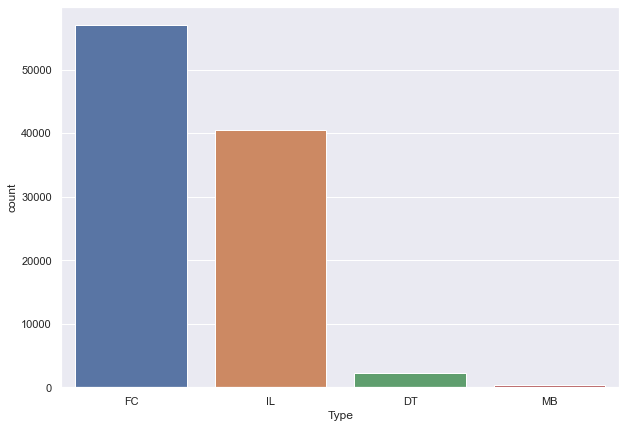

In [19]:
sns.countplot(test['Type'])

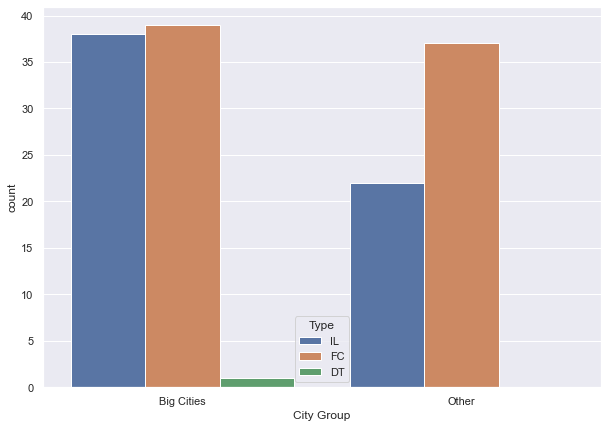

In [20]:
sns.countplot(train['City Group'], hue=train['Type'])

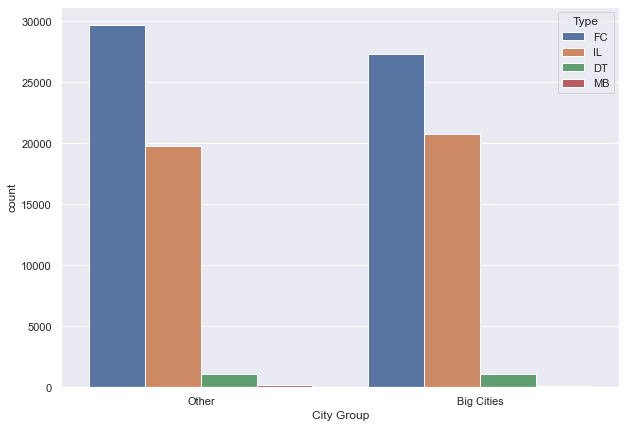

In [21]:
sns.countplot(test['City Group'], hue=test['Type'])

### Working with revenue
* Revenue is positively skewed with 2.79 skewness and 12.05 Kurtosis
* There are few outliers in the revenue column

In [22]:
train['revenue'].skew()

2.793478695162504

In [23]:
train['revenue'].kurtosis()

12.055176638707394

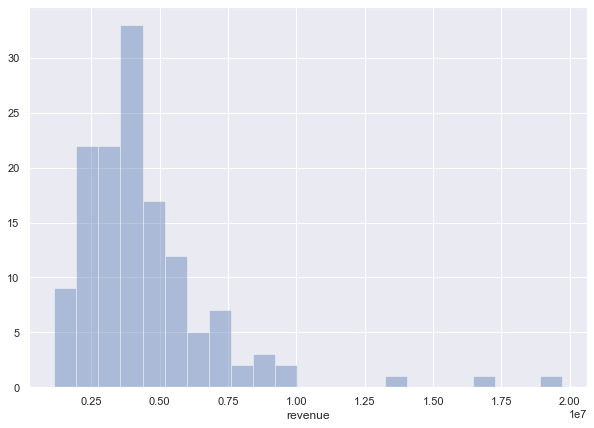

In [24]:
sns.distplot(train['revenue'], kde=False)

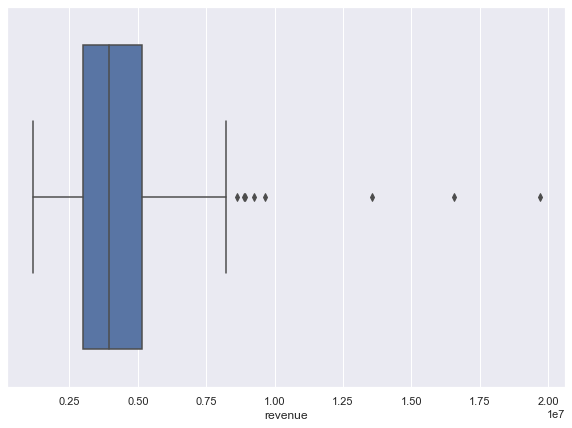

In [25]:
sns.boxplot('revenue', data= train)

### Accessing revenue by Cities

* Cities in big cities are doing pretty well expecially Istanbul which is expected considering the occurrences.

In [26]:
train.groupby([train['City Group'], train['City']])['revenue'].sum().sort_values(ascending=False).to_frame()

revenue
City Group City                       
Big Cities İstanbul        278890598.0
           Ankara           62232711.0
           İzmir            47588137.0
Other      Bursa            20461475.0
           Samsun           16239348.0
           Adana            14684833.0
           Antalya          13925793.0
           Kayseri          13702727.0
           Sakarya          13315413.0
           Eskişehir        11873860.0
           Diyarbakır       11206054.0
           Trabzon          10568201.0
           Tekirdağ          9937412.0
           Muğla             8222258.0
           Aydın             6859597.0
           Elazığ            5525735.0
           Edirne            5444227.0
           Konya             5334513.0
           Afyonkarahisar    4952497.0
           Balıkesir         4758476.0
           Gaziantep         4316715.0
           Bolu              4263629.0
           Isparta           4015749.0
           Karabük           3807496.0
           Kocaeli           3745135.0
           Osmaniye          3376145.0
           Kastamonu         3273041.0
           Şanlıurfa         3261924.0
           Kütahya           2993069.0
           Amasya            2954086.0
           Tokat             2675511.0
           Denizli           2344689.0
           Uşak              1763231.0
           Kırklareli        1619683.0

### Correlation of Numerical Features with the Target variable
* The engineered year column seems to have a moderate negative correlation with target variable

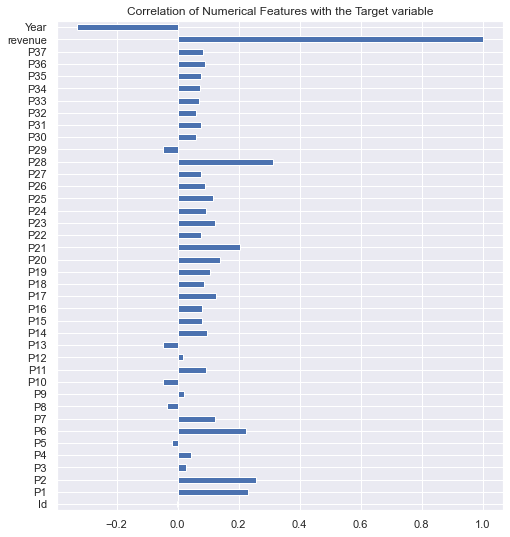

In [27]:
train.corr('spearman')['revenue'].plot.barh(figsize=(8,9), 
                                          title='Correlation of Numerical Features with the Target variable')

### Distribution of all the Features
* Majority of the columns have more zero(0) entries
* None of the columns are normally distributed

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CCD58D4EB0>,
      dtype=object)

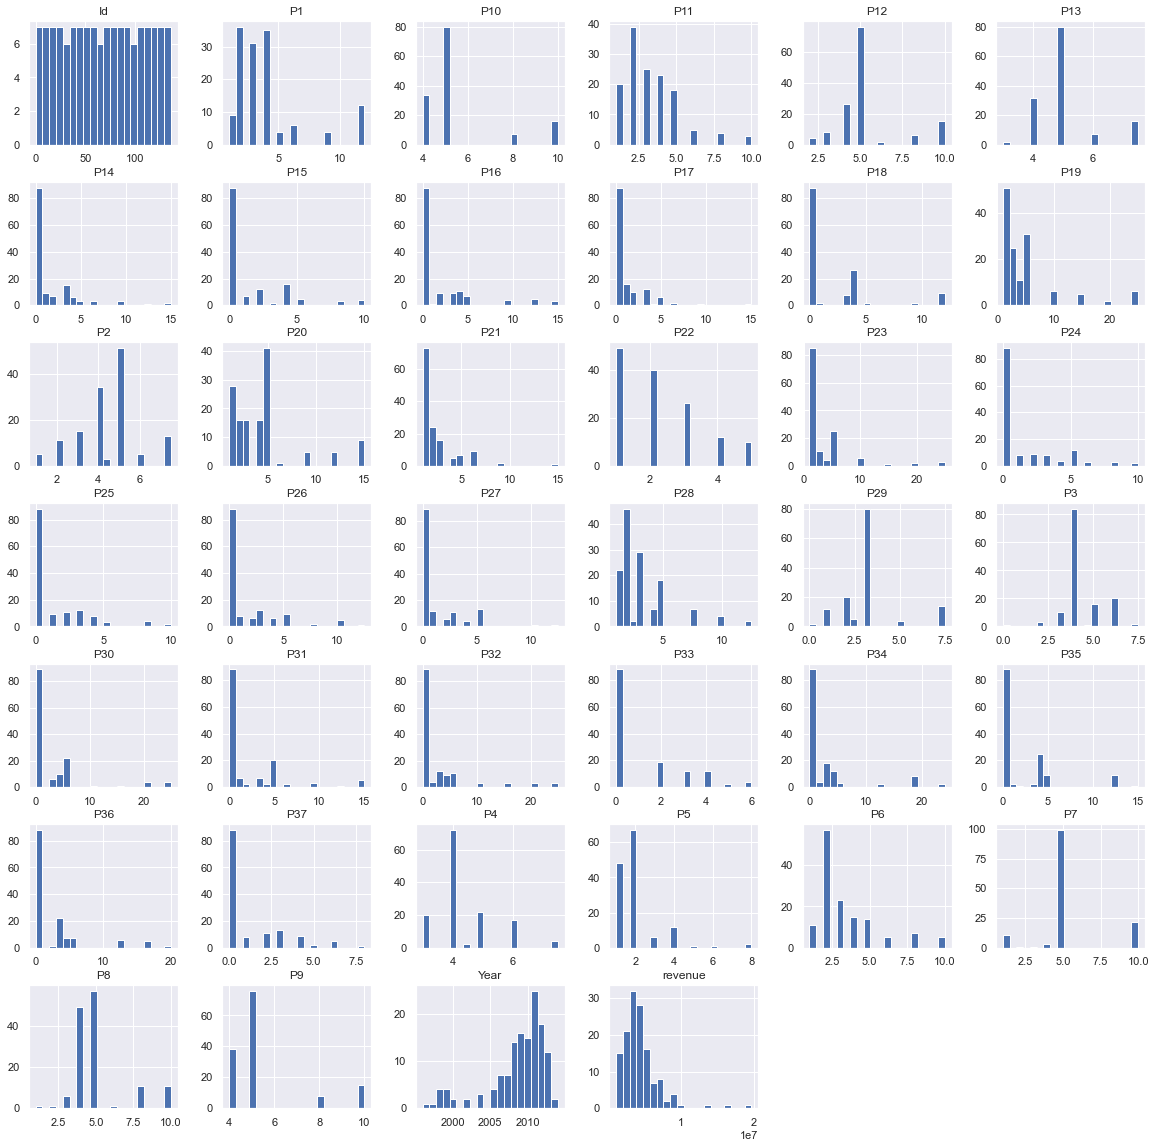

In [28]:
train.hist(bins=20, figsize=(20,20))